# Визуальный анализ данных с помощью Python

In [2]:
import pandas as pd # df.head, df.info, df.insight - запомнить!!!

In [3]:
dt = pd.read_csv('files/lesson_4/dt.csv')
dt.tail()

,ID_code,target,var_108
199995,train_199995,0,14.3787
199996,train_199996,0,14.2993
199997,train_199997,0,14.0837
199998,train_199998,0,14.2625
199999,train_199999,0,14.1260


In [4]:
dt.describe()

,target,var_108
count,200000.000000,200000.000000
mean,0.100490,14.224435
std,0.300653,0.171091
min,0.000000,13.729000
25%,0.000000,14.098900
50%,0.000000,14.226600
75%,0.000000,14.361800
max,1.000000,14.743000


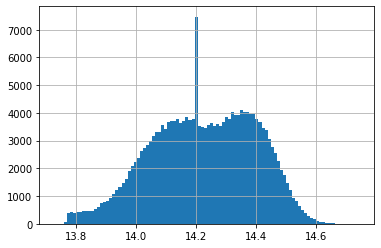

In [8]:
#dt['var_108'].hist()
dt['var_108'].hist(bins = 100) #bin данные группируются на равные промежутки 1/100

### API библиотеки matplotlib

Официальная документация по matplotlib - https://matplotlib.org/index.html.

In [9]:
#Корректное отображение графиков прямо в jupyter'e
%matplotlib inline
#Все функции matplotlib API, в частности plot и close, находятся в модуле matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

Графики в matplotlib существуют внутри объекта рисунка Figure. Создать новый рисунок можно методом plt.figure.

Нельзя создать график, имея пустой рисунок. Сначала нужно создать один или несколько подграфиков с помощью метода add_subplot: 

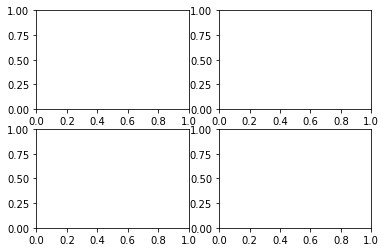

In [10]:
fig = plt.figure() #все рисунки существуют внутри объекта figure,инициализация фигуры
ax1 = fig.add_subplot(221) # подграфик в разметке 2*2 на 1 место
ах2 = fig.add_subplot(222) # разметка 2*2 на 2 место
ax3 = fig.add_subplot(223) # разметка 2*2 на 3 место
ax4 = fig.add_subplot(224)  

# If you are creating many figures, make sure you explicitly call "close"
# on the figures you are not using, because this will enable pylab
# to properly clean up the memory.

-----------

<img width = '400px' ALIGN='left' src="images/lesson_4/5179abf54c6fbad394dfef5ec2817828.png">

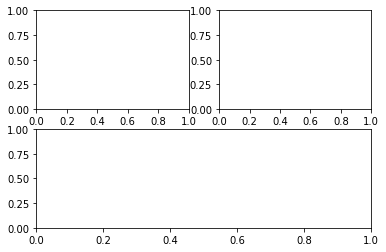

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ах2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212) # разметка 2 строки * 1 столбец, 2 место

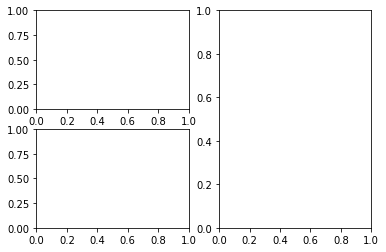

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ах2 = fig.add_subplot(122) #заполнение посторочноб разметка 1 строка, 2 столбца
ax3 = fig.add_subplot(223)   

In [12]:
from numpy.random import randn

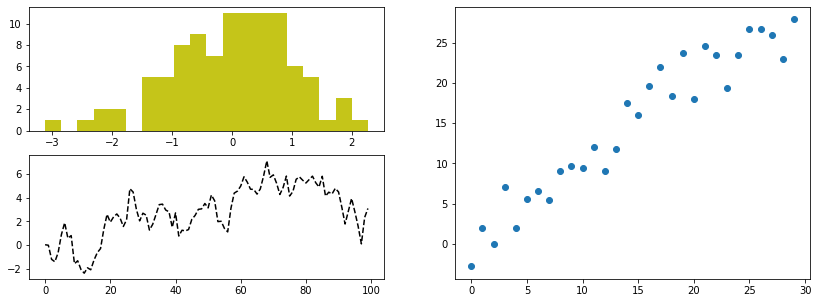

In [13]:
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(122) 
ax3 = fig.add_subplot(223)   

plt.plot(randn(100).cumsum(), 'k--') # отрисовка
# Метод fig.add_subplot возвращает объект AxesSubplot, что позволяет рисовать в любом подrрафике, вызывая методы этого объекта:
f = ax1.hist(randn(100), bins=20, color='y', alpha=0.9)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30)) 

In [14]:
f # что возвращает гистограмма

(array([ 1.,  0.,  1.,  2.,  2.,  0.,  5.,  5.,  8.,  9.,  7., 11., 11.,
        11., 11.,  6.,  5.,  1.,  3.,  1.]),
 array([-3.12357933, -2.8539031 , -2.58422687, -2.31455064, -2.04487441,
        -1.77519818, -1.50552195, -1.23584572, -0.96616949, -0.69649326,
        -0.42681703, -0.1571408 ,  0.11253543,  0.38221167,  0.6518879 ,
         0.92156413,  1.19124036,  1.46091659,  1.73059282,  2.00026905,
         2.26994528]),
 <a list of 20 Patch objects>)

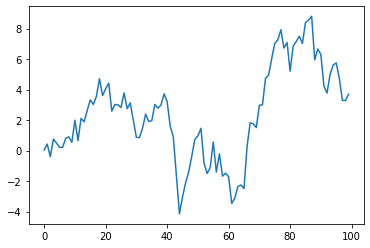

In [15]:
#Отдельно данный метод тоже будет работать, так как при необходимости он автоматически создаст рисунок и подграфик
plt.plot(randn(100).cumsum())

 Поскольку создание рисунка с несколькими подграфиками, расположенными определенным образом, - типичная задача, существует вспомогательный метод plt.subplots, который создает новый рисунок и возвращает массив NumPy, содержащий созданные в нем объекты подграфиков: 

<BarContainer object of 10 artists>

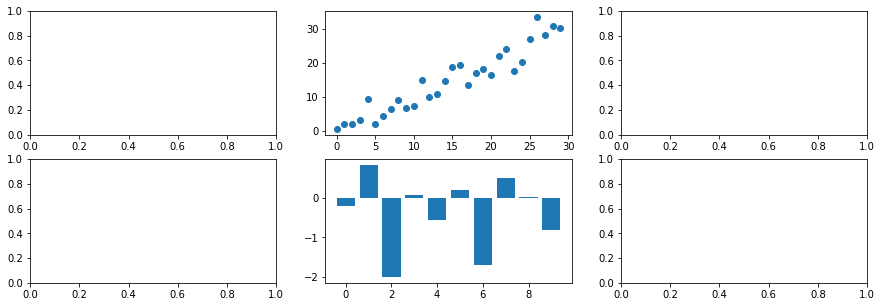

In [16]:
fig, axes = plt.subplots(2, 3)#количество строк, столбцов
fig.set_figheight(5)
fig.set_figwidth(15)

axes[0,1].scatter(np.arange(30), np.arange(30) + 3 * randn(30)) 
axes[1,1].bar(np.arange(10),  randn(10)) # 9 наблюдений со случайными значениями

In [17]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1e35bd198>,
      dtype=object)

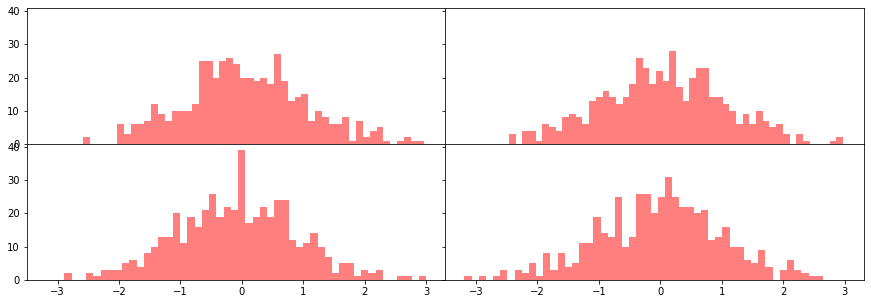

In [18]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color= 'r', alpha=0.5) 
#Достаточно популярный способ задания пустого пространства вокруг графиков         
plt.subplots_adjust(wspace=0.0, hspace=0.0) #расстояние между графиками по вертикали и горизонтали

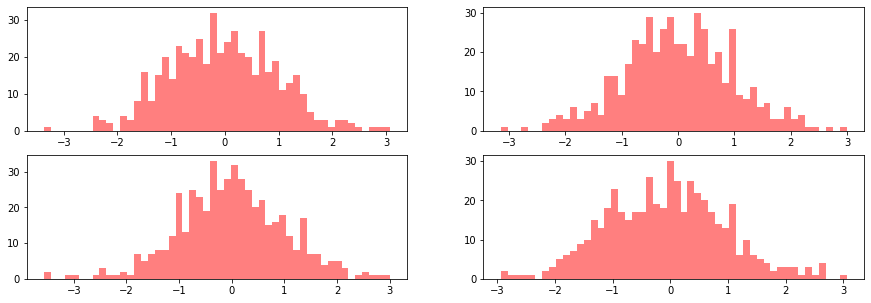

In [19]:
#Обратить внимание на общую ось 
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color= 'r', alpha=0.5) 
#Достаточно популярный способ задания пустого пространства вокруг графиков         
plt.subplots_adjust(wspace=0.2, hspace=0.2) 

In [20]:
#Сохранение рисунка
# plt.savefig('figpath.png', dpi=400, bbox_inches= 'tight') 

### Конфигурирование matplotlib 

В начальной конфигурации matplotlib заданы цветовые схемы и умолчания, ориентированные главным образом на подготовку рисунков к публикации. По счастью, почти все аспекты поведения по умолчанию можно сконфигурировать с помощью обширного набора глобальных параметров, определяющих размер рисунка, промежутки между подграфикам:и, цвета, размеры шрифтов, стили сетки и т. д.

In [21]:
#Задает глобально размер рисунка
plt.rc('figure', figsize=(10, 10)) #свойство+размер
font_options = {'family' : 'monospace'} 
plt.rc('font', **font_options) 

### Упражнение

In [22]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

Для выполнения упражнения необходимо изучить следующие методы объекта subplot axes:
    - set_xlabel/set_ylabel
    - set_title
    - grid

<BarContainer object of 6 artists>

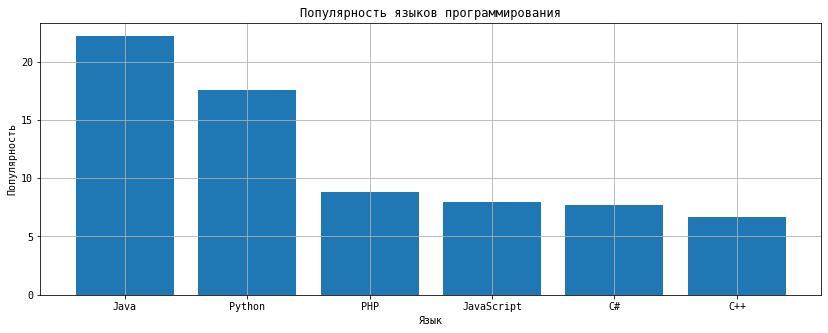

In [37]:
fig, axes = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(14)
axes.grid()
axes.set_title('Популярность языков программирования')
axes.set_xlabel('Язык')
axes.set_ylabel('Популярность')
axes.bar(x,  popularity)

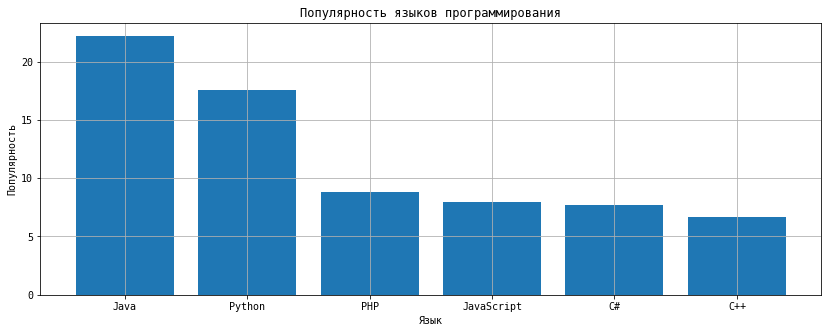

### Визуализация с помощью Pandas

Датасет - https://www.kaggle.com/open-powerlifting/powerlifting-database.

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('files/lesson_4/openpowerlifting.csv', sep = ',')

In [40]:
df.head(2)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
MeetID            386414 non-null int64
Name              386414 non-null object
Sex               386414 non-null object
Equipment         386414 non-null object
Age               147147 non-null float64
Division          370571 non-null object
BodyweightKg      384012 non-null float64
WeightClassKg     382602 non-null object
Squat4Kg          1243 non-null float64
BestSquatKg       298071 non-null float64
Bench4Kg          1962 non-null float64
BestBenchKg       356364 non-null float64
Deadlift4Kg       2800 non-null float64
BestDeadliftKg    317847 non-null float64
TotalKg           363237 non-null float64
Place             385322 non-null object
Wilks             362194 non-null float64
dtypes: float64(10), int64(1), object(6)
memory usage: 50.1+ MB


In [42]:
cols = ['Equipment', 'Age',  'BodyweightKg', 'WeightClassKg', 'BestSquatKg','BestBenchKg','BestDeadliftKg','Place','TotalKg','Sex']
df = df[cols]
df.head()

,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Place,TotalKg,Sex
0,Wraps,47.0,59.60,60,47.63,20.41,70.31,1,138.35,F
1,Single-ply,42.0,58.51,60,142.88,95.25,163.29,1,401.42,F
2,Single-ply,42.0,58.51,60,142.88,95.25,163.29,1,401.42,F
3,Raw,42.0,58.51,60,NaN,95.25,NaN,1,95.25,F
4,Raw,18.0,63.68,67.5,NaN,31.75,90.72,1,122.47,F


Реализация функции plot в pandas основана на библиотеке matplotlib.

#### Одномерные данные

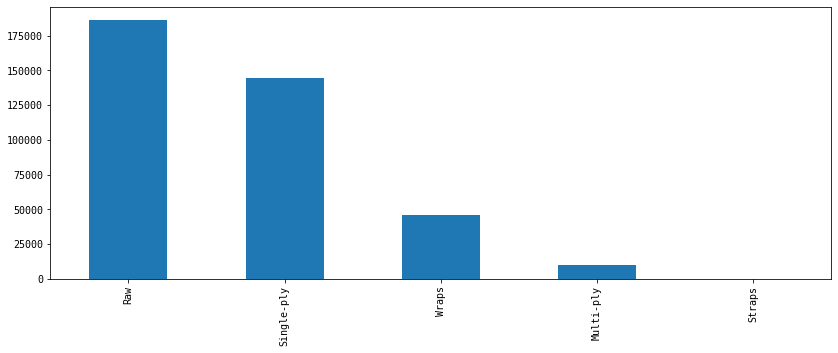

In [45]:
fig = plt.figure(figsize= (14,5))
df['Equipment'].value_counts().plot.bar()
#Bar Chart (столбчатая диаграмма) - классический интсрумент для отображения информации по категориям

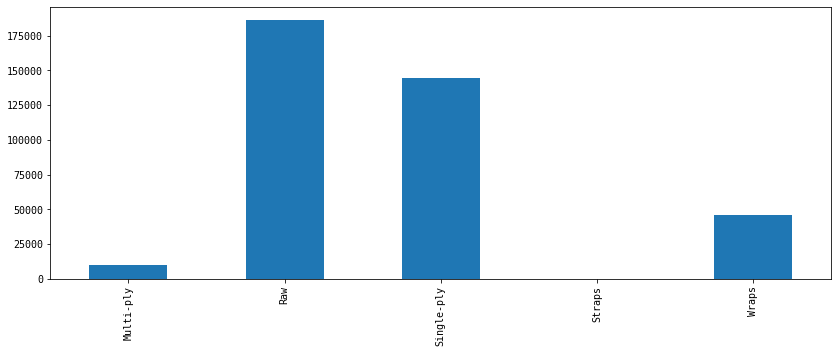

In [46]:
fig = plt.figure(figsize= (14,5))
df['Equipment'].value_counts().sort_index().plot.bar()

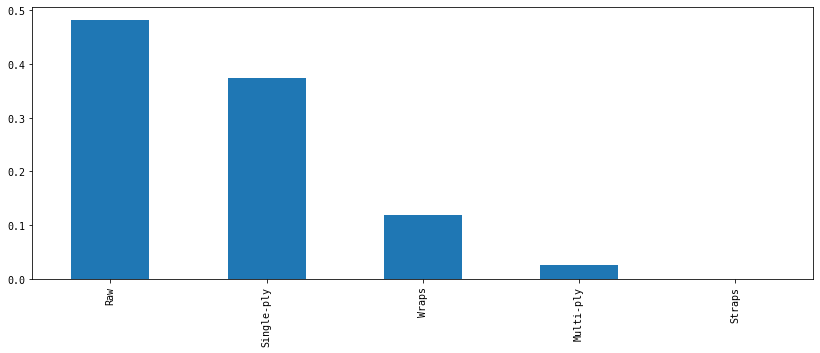

In [47]:
#Можно посмотреть относительные наблюдения
fig = plt.figure(figsize= (14,5))
(df['Equipment'].value_counts() / len(df)).plot.bar() 

In [48]:
df.groupby(['Equipment'])[['BodyweightKg','TotalKg']].mean()

,BodyweightKg,TotalKg
Equipment,,
Multi-ply,102.474594,564.909626
Raw,85.221058,387.071285
Single-ply,86.649009,428.380619
Straps,116.571429,388.214286
Wraps,91.546736,534.348735


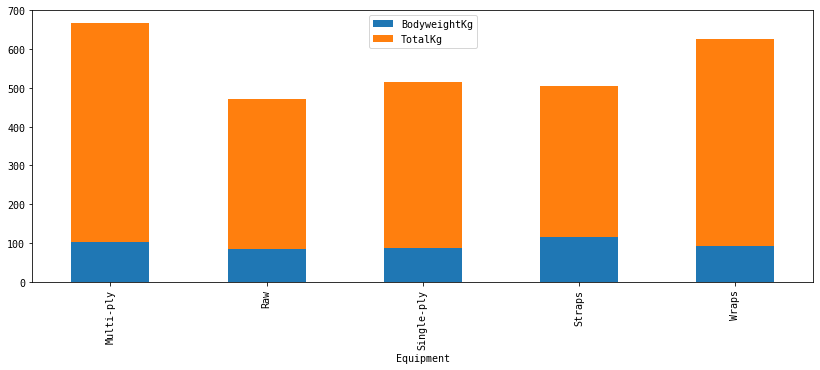

In [51]:
df.groupby(['Equipment'])[['BodyweightKg','TotalKg']].mean().plot.bar(figsize=(14,5),stacked = True) #один наслаивается на другой stacked

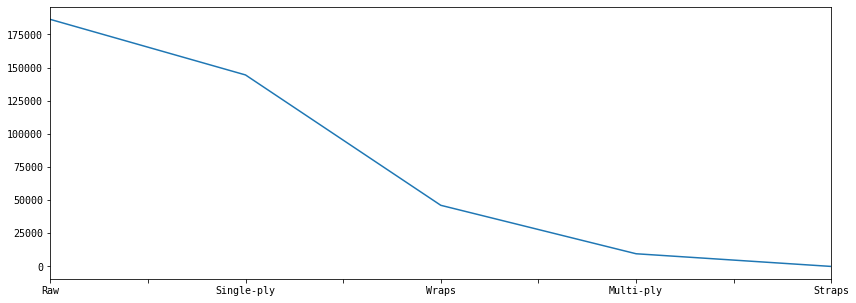

In [52]:
#Используется при большом количестве вариантов категориальной переменной (более 20 значений) 
fig = plt.figure(figsize= (14,5))
chart = df['Equipment'].value_counts().plot.line()
plt.show()

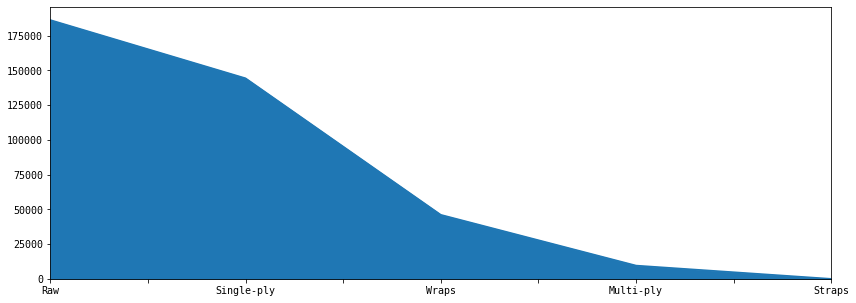

In [53]:
fig = plt.figure(figsize= (14,5))
chart = df['Equipment'].value_counts().plot.area()

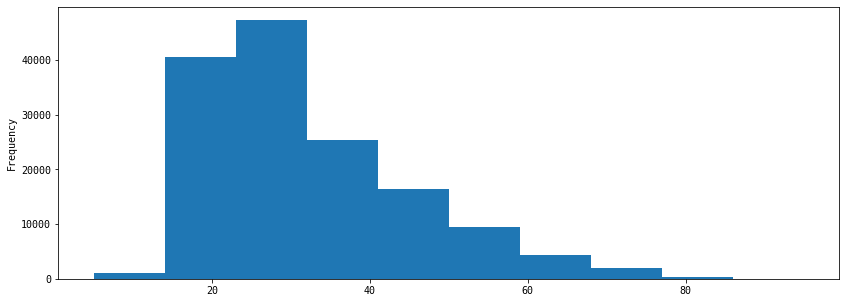

In [54]:
fig = plt.figure(figsize= (14,5))
df['Age'].plot.hist(bins= 10) # сколько наблюдений для каждого бина
#Гистограмма - классический инстрмуент для визуализации интервальных данных
#Визуально похожа на столбчатую диаграмму,гистограмма разбивает данные на равные интервалы и рисует частоты в каждом из столбцов

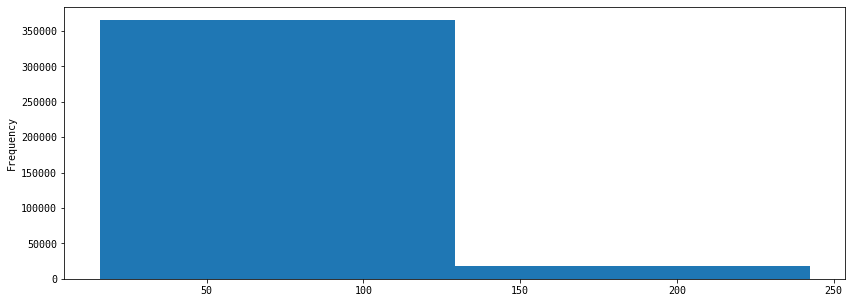

In [55]:
fig = plt.figure(figsize= (14,5))
df['BodyweightKg'].plot.hist(bins = 2)
# параметр bins

#### Двумерные данные

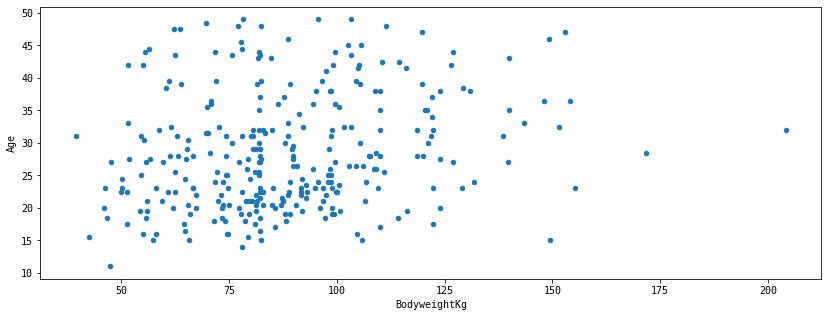

In [56]:
df[df['Age']<50].sample(300).plot.scatter(x='BodyweightKg', y='Age',figsize=(14,5))
#Используется для того, чтобы показать зависимость одного показателя от другого

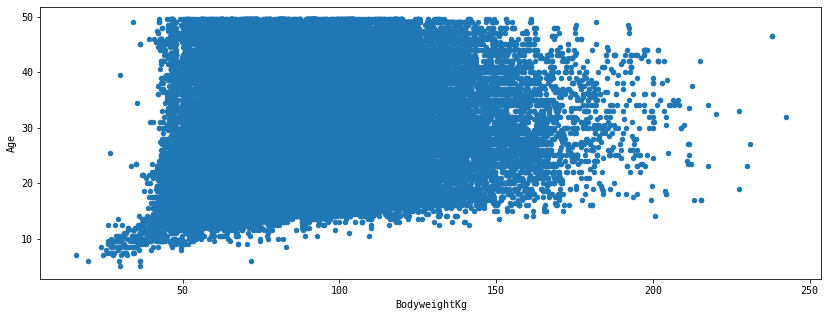

In [57]:
df[df['Age']<50].plot.scatter(x='BodyweightKg', y='Age',figsize=(14,5))
#Получается очень непонятно

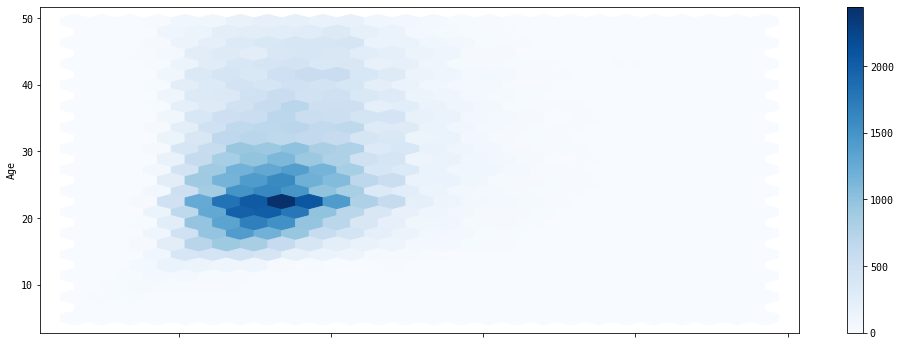

In [58]:
df[df['Age']<50].plot.hexbin(x='BodyweightKg', y='Age',figsize=(17,6), gridsize = 25,cmap ='Blues')

### Визуализация с помощью Seaborn

Seaborn также реализован на matplotlib. Outofbox решение для построения визуализаций.

In [59]:
import seaborn as sns

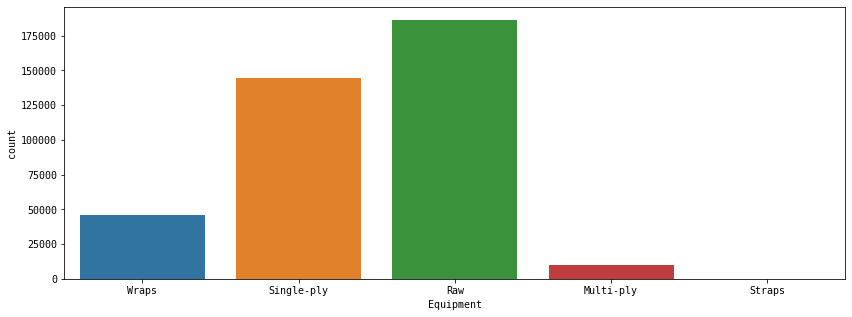

In [60]:
fig = plt.figure(figsize= (14,5))
sns.countplot(df['Equipment'])
#pandas bar = seaborn countplot
#Делается намного проще, нет нужды в агрегации с помощью value_counts

/home/nastyboget/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/nastyboget/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


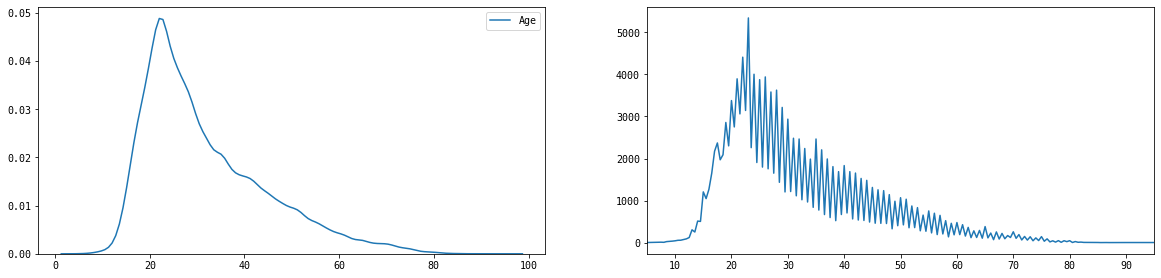

In [61]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age)
#В статистике - оценка плотности ядра - один из вариантов сглаживания
ax2 = fig.add_subplot(222) 
df['Age'].value_counts().sort_index().plot.line()

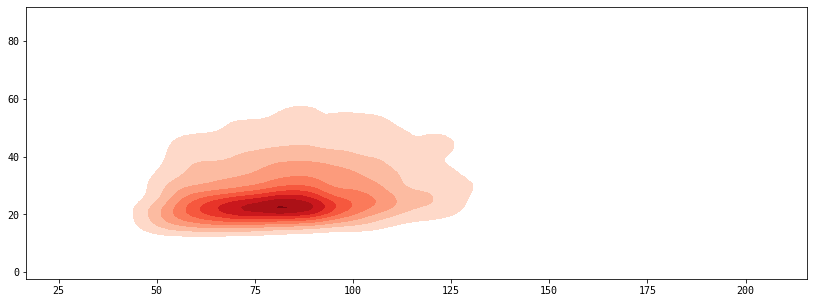

In [64]:
fig = plt.figure(figsize= (14,5))
sns.kdeplot(df.loc[:, ['BodyweightKg','Age']].dropna().sample(5000), color='r', cmap='Reds', shade=True, shade_lowest=False)

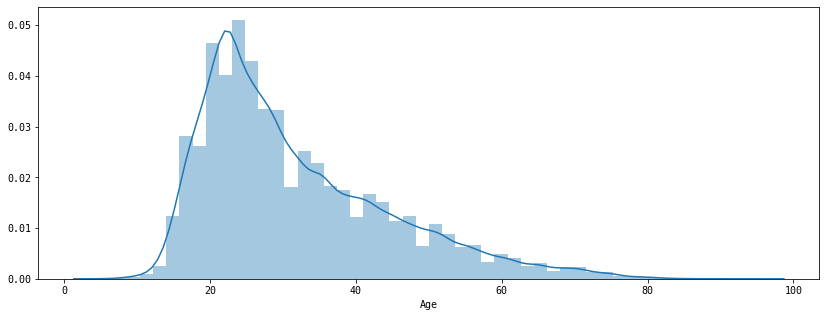

In [66]:
#Аналог гистограммы
fig = plt.figure(figsize= (14,5))
sns.distplot(df['Age'].dropna(),kde = True)#график распределения kde-ядерное сглаживание

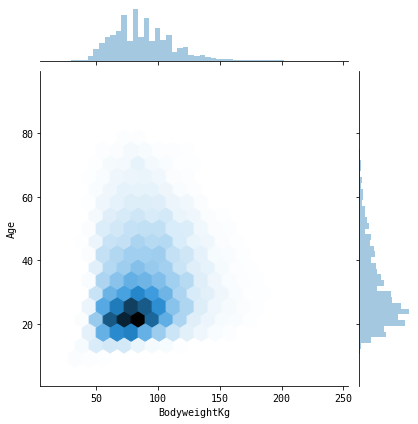

In [67]:
#Аналог scatterplot
sns.jointplot(x='BodyweightKg', y='Age', data=df, kind = 'hex',gridsize=20)#распределение обоих+пересечение

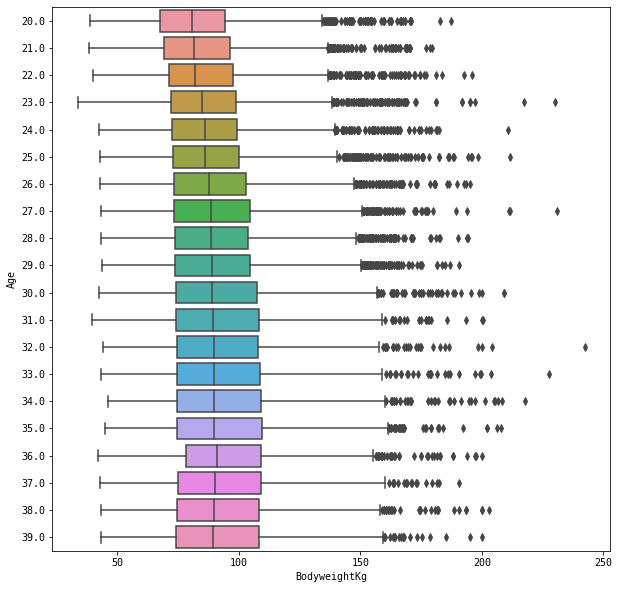

In [68]:
sns.boxplot(y="Age", x="BodyweightKg", data=df[df.Age.isin(np.arange(20,40,1))], orient="h")

Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), 25 процентиль - число больше чем 25% наблюдений, 1 квартиль - 25 персентиль, 2 квартиль - 50 процентиль или медиана, линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов), и они могут определяться несколькими способами. Наиболее распространённые значения, определяющие длину «усов»:

- Минимальное и максимальное наблюдаемые значения данных по выборке (в этом случае выбросы отсутствуют);
- Разность первого квартиля и полутора межквартильных расстояний; сумма третьего квартиля и полутора межквартильных расстояний.
Интерквартильный размах - разница между квартилями

<img width = '500px' src="images/lesson_4/d0ff538d59154901b18a98469de07fde.png">

Данные, выходящие за границы усов (выбросы), отображаются на графике в виде точек, маленьких кружков или звёздочек. Иногда на графике отмечают среднее арифметическое и его доверительный интервал («зарубка» на ящике). Иногда зарубками обозначают доверительный интервал для медианы.

В связи с тем, что не существует единого общего согласия относительно того, как конкретно строить «ящик с усами», при виде такого графика необходимо искать информацию в сопроводительном тексте относительно того, по каким параметрам ящик с усами строился.

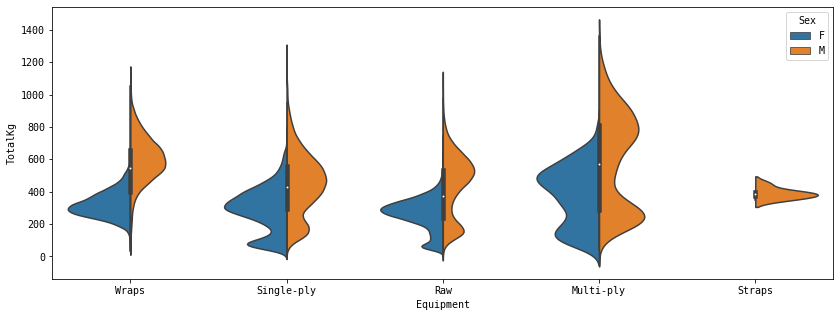

In [69]:
fig = plt.figure(figsize= (14,5))
sns.violinplot(y="TotalKg", x="Equipment",hue = 'Sex', split = True,data=df) #распределение по каждой из категорий в отдельности

In [70]:
cols = ['Age', 'BodyweightKg',  'BestSquatKg',
       'BestBenchKg', 'BestDeadliftKg','TotalKg']
sns_plot = sns.pairplot(df[cols].dropna()) #как каждая фича зависит от другой

Error in callback <function flush_figures at 0x7fd1e57290d0> (for post_execute):


KeyboardInterrupt: 

In [49]:
#Корреляция признаков
df[cols].dropna().corr()

,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg
Age,1.000000,0.105304,-0.033262,0.034416,-0.037814,-0.016395
BodyweightKg,0.105304,1.000000,0.653468,0.663675,0.639829,0.674406
BestSquatKg,-0.033262,0.653468,1.000000,0.911109,0.907187,0.976384
BestBenchKg,0.034416,0.663675,0.911109,1.000000,0.877505,0.956819
BestDeadliftKg,-0.037814,0.639829,0.907187,0.877505,1.000000,0.962902
TotalKg,-0.016395,0.674406,0.976384,0.956819,0.962902,1.000000


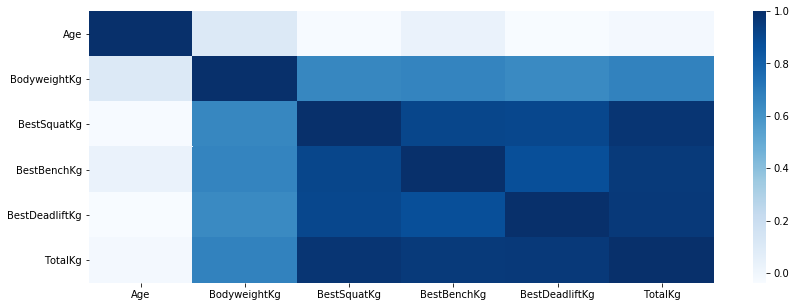

In [48]:
#Тепловая карта
fig = plt.figure(figsize= (14,5))
sns.heatmap(df[cols].dropna().corr(), cmap = 'Blues')

### Упражнение

In [71]:
partizan = pd.read_excel('files/lesson_4/partizan.xlsx')
partizan.tail()

,chain_name,lon,lat,orders
30,Zvjezda,37.718238,55.794452,4
31,Amazonija,37.748619,55.791744,5
32,Spasibo,37.728523,55.818736,0
33,Gurman_msk,37.734201,55.783089,0
34,Super_Papas,37.751179,55.780795,0


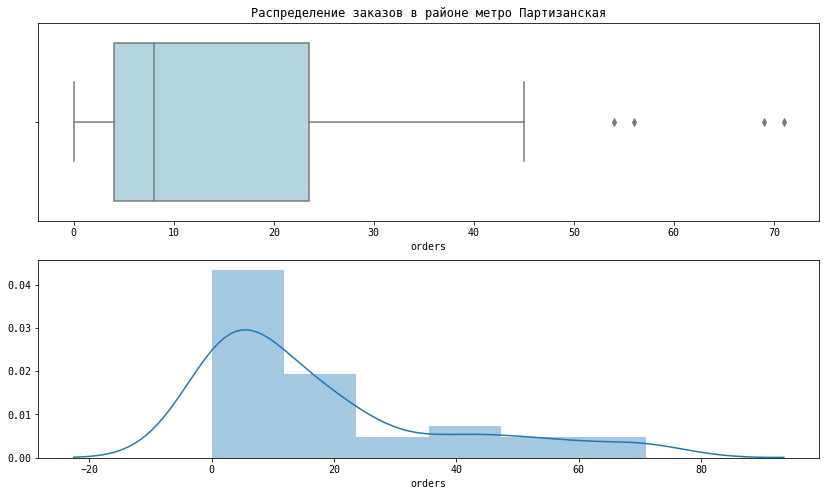

In [101]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(14)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_title('Распределение заказов в районе метро Партизанская')
sns.boxplot(x="orders", ax=ax1, data=partizan[partizan.orders.isin(np.arange(-25,100,1))], orient="h", color='lightblue')
sns.distplot(partizan['orders'].dropna(), ax=ax2, kde = True)#график распределения kde-ядерное сглаживание

Text(0.5, 0, 'Заказы')

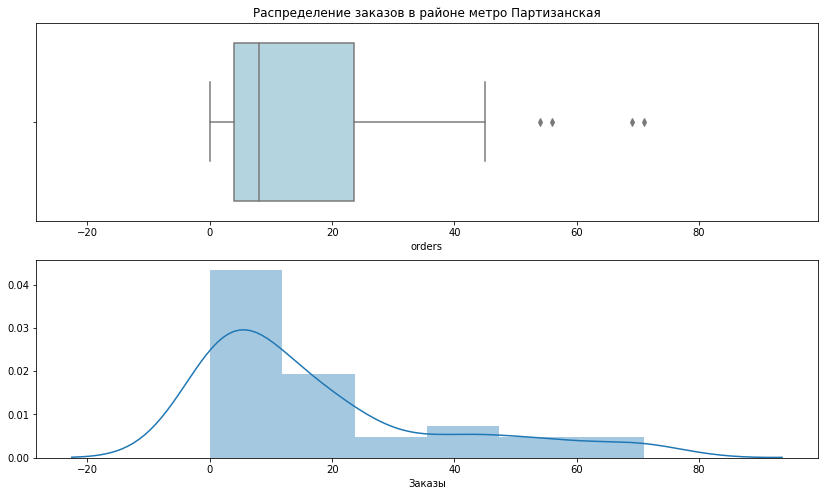

In [102]:
import folium
from folium import plugins #капризна к версиям других библиотек

In [103]:
lats = list(partizan.lat)
longs = list(partizan.lon)
places=[[x[0],x[1]] for x in zip(lats,longs)]

m = folium.Map(places[0], tiles = 'OpenStreetMap', zoom_start=13)

plugins.MarkerCluster(places).add_to(m)
# plugins.BoatMarker(places[0]).add_to(m)
plugins.FastMarkerCluster(places).add_to(m)

m